# COGS 108 - Data Checkpoint

## Authors

* Cassidy Burns: Conceptualization, Project administration,  Background research
* Mason Oelschlager: Conceptualization, Experimental investigation, Project administration
* Vu Luong: Conceptualization, Data curation, Project administration
* David Khoury: Conceptualization, Project administration
* Jorell Jusay: Conceptualization, Data curation, Project administration

## Research Question

Does a decline of 50% or more in average monthly players within the first 12 months after a game’s peak significantly predict whether a Steam game will experience a sustained collapse in player engagement, defined as falling to 5% of its peak concurrent players, within the following 24 months?


## Background and Prior Work

Online multiplayer games depend on continued player engagements to justify the ongoing costs of server infrastructure, moderation, live updates and development support. These games require an active player base, and while engagement declines, companies must decide whether maintaining servers will be worth the commitment and resources used. There is yet to be a standardized, data driven benchmark that defines when a game has reached the point of sustained collapse. As a result, the threshold at which a game is considered no longer viable remains unclear. The lack of transparency creates uncertainty for players who are investing time and money without knowing how stable the game’s future truly is. 

Companies commonly consider several measurable factors when seeing whether to continue supporting certain titles. These can include concurrent player counts, monthly active users, retention rates, and the cost of maintaining development relative to revenue. Among these observable traits, player count is the most visible and consistently available metric, especially on platforms such as Steam. By tracking peaks and declines in concurrent players over time and often identify sharp falloffs following launch periods or major updates. In several live service cases, including MultiVersus, there is a noticeable pattern of an early peak followed by a rapid drop in players. While some decline after launch is expected, it is unclear at what point that decline signals long term collapse rather than normal market stabilization.

Existing research has approached this issue by modeling player retention and churn instead of defining a concrete collapse threshold. In Improved Retention Analysis in Freemium Role Playing Games by Jointly Modelling Players’ Motivation, Progression and Churn, the authors show that declining progression and reduced engagement are strong indicators that players are likely to stop playing altogether. Similarly, A Data Imputation Strategy to Enhance Online Game Churn Prediction, Considering Non Login Periods demonstrates that extended inactivity is a reliable predictor of permanent disengagement when properly modeled. These studies establish that measurable declines in engagement precede churn at the individual level. However, they do not define a population level benchmark that signals when a game as a whole is likely to experience sustained collapse. This gap motivates the present study, which tests whether a substantial early decline in average monthly players can serve as a measurable predictor of long term engagement deterioration across Steam multiplayer games.

^ Lee, JaeHong, et al. “A Data Imputation Strategy to Enhance Online Game Churn Prediction, Considering Non-Login Periods.” MDPI, Multidisciplinary Digital Publishing Institute, 23 June 2025, www.mdpi.com/2306-5729/10/7/96.

^ Karmakar, Bikram, et al. “Improved retention analysis in freemium role-playing games by jointly modelling players’ motivation, progression and churn.” Journal of the Royal Statistical Society Series A: Statistics in Society, vol. 185, no. 1, 11 Aug. 2021, pp. 102–133, https://doi.org/10.1111/rssa.12730.


## Hypothesis


Relating to our research question, this study investigates whether an early and substantial decline in player activity predicts long-term collapse in Steam multiplayer games. We expect that Steam games which see a drop of 50% or more in average monthly players within the first 12 months after reaching their peak are far more likely to experience a sustained collapse in player engagement, defined as falling to 5% of their peak concurrent players, within the following 24 months, compared to games that do not show such an early decline.


## Data

### Data overview

Updated Data Proposal: 

The ideal dataset for this study would show Steam multiplayer games observed at consistent monthly intervals from each game’s release until either its shutdown or the present. Each observation would represent a game-month, allowing us to track how player counts change over time and compare trajectories between games that remain stable and games that experience sustained collapse. Because the hypothesis focuses specifically on whether an early and substantial decline in player activity predicts long-term collapse, the most critical variables are those directly related to player counts and timing.

The dataset would include monthly average concurrent players, monthly peak concurrent players, each game’s historical peak player count, and an indicator for whether the game has shut down, along with the shutdown date if applicable. From these core variables, we would construct derived measures such as the percentage decline from the historical peak, whether a game experienced a decline of at least 50 percent within 12 months of reaching its peak, and whether the game later fell to 5 percent or less of its historical peak within 24 months. These constructed variables directly operationalize the independent variable of early substantial decline and the dependent variable of sustained collapse, making the dataset sufficient to test the central hypothesis.

Although our main hypothesis focuses on observable player count trajectories, the ideal setting would also provide additional engagement and contextual variables such as average playtime per user, monthly active users vs. concurrent players, update frequency, monetization model, and user review sentiment over time. These extra variables would allow for secondary analyses examining whether early decline predicts shutdown while accounting for engagement. However, these variables are not required to test the main hypothesis, allowing us to utilize player counts to answer the question.   

There are important differences between the ideal and real datasets. The Kaggle dataset does not include explicit shutdown indicators, monetization models, detailed engagement metrics such as playtime or churn, or structured sentiment measures. As a result, sustained collapse will be operationalized strictly in terms of player count thresholds rather than confirmed company shutdown decisions. While this limits our ability to directly evaluate financial viability or company decision making, it does not prevent us from testing whether early substantial declines in player activity are statistically associated with long-term engagement deterioration. Future work could incorporate additional data from the Steam API or public shutdown announcements to validate and extend the classification of collapse.


#### Dataset #1
* Name: Steam Monthly Average Players
* Link: https://www.kaggle.com/datasets/lunthu/steam-monthly-average-players?resource=download
* Download: https://drive.google.com/uc?id=14-RTZD1GOc_JKGs32btNxfLe4bZ9WTOw
* Number of Observations: 612265
* Number of Variables: 7
* Valuable Variable Descriptions:
    * month (month-year): This is the month and respective year of a given observation. (string)
    * avg_players (average players): The avg_players is the average number of users/players of a given game during the span of a given month. (float)
    * gain_percent (gain percent): The gain_percent variable is the difference, as a percentage, in the given month's average players (avg_players) versus the average number of players in the previous month. (float)
    * peak_players (peak players): The peak_players variable defines the peak concurrent users for a given Steam game within the given month. (float)
    * name (name): Necessary for the unique identification of given games on the Steam platform and their corresponding monthly user averages, gains, and peaks. (string)
* Shortcomings:
    * The dataset doesn’t have the necessary data to determine “why” declines or gains occur. The datasets lack the context of given games, such as genre or models of monetization (which may have different product lifecycles). We can only determine if there is or isn’t a correlation between 50% collapse from peak within 12 months of historical concurrent player peak and a “sustained collapse” (5% of peak in the following 24 months)
    * The length of timelines for games varies. We will have to select games with at least 36 months of history after their historical concurrent player peak (within the dataset). This creates a bias that will potentially ignore newer underlying trends due to lack of observation in newer games. Additionally, some games have data gaps where they may disappear from records for several months at a time.
    * The peak may not include the initial game release peak because the dataset only begins in July 2012, and some games (such as Counter-Strike) were released in years prior.
    * In very small games (such as those with a peak of 10 players), there is high player volatility, which could skew the statistical significance.
    * During 2018 (April), Steam made a change to the privacy of profiles, which may have led to some scraping tools to capture artificially low declines in player counts.


In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [3]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://drive.google.com/uc?id=14-RTZD1GOc_JKGs32btNxfLe4bZ9WTOw', 'filename':'steamcharts.csv'}]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Overall Download Progress: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]         

Successfully downloaded: steamcharts.csv


### Dataset #1: Monthly Average Players for Games on Steam (Jul 2012-Sep 2025)

Our data set encompasses the historical average and peak monthly number of players across 6725 different games available on the platform called Steam (from July 2012 up until September 2025). Thus, in our pursuit of analysis, there are several important metrics that this particular data set includes: month of observation (month/string), the average player count for the month (avg_players/float), the percentage of gain or decline compared to the previous month in terms of player average (gain_percent/float), the peak concurrent players for a game during the given month (peak_players/float), and finally the name of the listed game on Steam (name). The numerical and percentage variables are the key components of our analysis because they observe the trends in concurrent players for given Steam games.

The most useful of our data set’s variables will likely be the monthly average player count, gain_percentage, and peak player counts because we will be able to directly track the historical player gains and declines comparatively to a game's “peak” and thus analyze whether there is a pattern across Steam games as they rise and decline. Particularly, whether there is a relationship between a 50% decline in player average within 12 months of the peak, and the following 24 months, if it results in “collapse” with the remaining player base of 5% of its peak.

There are concerns with the dataset that should be noted, also acknowledged in the dataset’s “shortcomings.” One of the biggest of which is that the dataset only provides observations and not a reasonable means of exploring or identifying underlying trends that influence the rises and falls of concurrent players for a given game. For our question, this means only being able to identify a trend in the “what” and not make a conclusion in the “why.” This is perhaps helpful to a degree, but game developers would need the “why” to implement change. The dataset does not encompass the genre or the monetization model of the games, which could impact whether or not their lifecycle is seemingly natural or not (ex. A single player open-world game may be influenced by completion rate, which could differ significantly from that of a free multiplayer shooter). Thus, answering our research question by analyzing this dataset means a degree of assumption of how the differences in these genres (or other variables) influence the gain and decline of player bases.


(612265, 6)
--------------------------------
MAX AVERAGE PLAYER COUNT: 
         month  avg_players  gain_percent  peak_players                 name  \
510195  Jan-18      1584887         0.104       3236027  PUBG: BATTLEGROUNDS   

        steam_appid  
510195       578080  
--------------------------------
MAX PERCENT GAIN: 
         month  avg_players  gain_percent  peak_players  \
603479  May-19       102719   1622960.339        191816   

                             name  steam_appid  
603479  Total War: THREE KINGDOMS       779340  
--------------------------------
MAX PEAK PLAYER COUNT
         month  avg_players  gain_percent  peak_players                 name  \
510195  Jan-18      1584887         0.104       3236027  PUBG: BATTLEGROUNDS   

        steam_appid  
510195       578080  
--------------------------------


,month,avg_players,gain_percent,peak_players,name,steam_appid
0,Sep-25,7805,0.128,13254,Counter-Strike,10
1,Aug-25,6922,-0.061,12168,Counter-Strike,10
2,Jul-25,7371,-0.102,13951,Counter-Strike,10
3,Jun-25,8205,-0.094,15798,Counter-Strike,10
4,May-25,9053,-0.050,15333,Counter-Strike,10


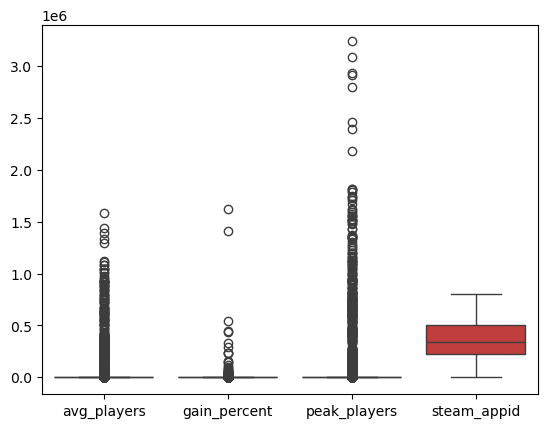

In [12]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
import pandas as pd 
import seaborn as sns 
import numpy as np
from pathlib import Path


# (A) the line below load the raw data from data/00-raw into df_charts
df_charts = pd.read_csv('data/00-raw/steamcharts.csv') 

# ---------------------------------------------------------------------------------------------------

# (D) & (F) We are using data from Kaggle so there is no missing data on any column on any row,
# but just to make sure, we are using dropna() which by default drop any rows that have
# a missing value in any of its column on that row. The reason we use dropna to clean up our
# data is because in our clean version of the data, we only keep the column of data that we want,
# so any missing data in any column in any rows would only mess up our analysis.
# So after using dropna, we further clean our data by removing the [gain] column since it output the raw
# value of player that was gained or lost, but since each game have different degree of popularity and thus
# different player count, we would only care about the gain percentage, so the [gain] column is unnecessary 
df_charts.dropna()
df_charts.drop_duplicates()

df_charts['avg_players'] = df_charts['avg_players'].apply(round) #Round avg_players to the nearest whole 
#Function to round to nearest thousandth 
def rounder(num): 
    return round(num, 3) 
    
df_charts['gain_percent'] = df_charts['gain_percent'].apply(rounder) #Round percentage to nearest 3 decimals 

df_clean = df_charts[['month','avg_players','gain_percent','peak_players','name','steam_appid']]

# -----------------------------------------------------------------------------------------------------

# (C) the 2 line below is to demonstrate the size of the dataset which is also printed out at the beginning, 
# which show that it is 612265 x 6, aka it have 6 column and 612265 rows
shape = df_clean.shape 
print(shape)

# ----------------------------------------------------------------------------------------------------

# (E) We are trying to find any outlier / suspicious entries in our clean dataset
# by plotting a boxplot and 

#def rounding(num): 
#    num = num/50000
#    return round(num) * 50000

#df_avg_player = df_clean['avg_players'].apply(rounding)
#avg_player_plot = sns.boxplot(data = df_avg_player)

clean_box = sns.boxplot(data = df_clean)

#percent_plot = sns.scatterplot(data = df_clean['gain_percent'])

#df_clean['avg_players'].sort_values().head(5)
#df_clean['gain_percent'].sort_values().head(5)
#df_clean['peak_players'].sort_values().head(5)

max_avg = max(df_clean['avg_players'])
max_gain = max(df_clean['gain_percent'])
max_peak =  max(df_clean['peak_players'])

print('--------------------------------')
print('MAX AVERAGE PLAYER COUNT: ')
print(df_clean.loc[df_clean['avg_players'] == max_avg])
print('--------------------------------')

print('MAX PERCENT GAIN: ')
print(df_clean.loc[df_clean['gain_percent'] == max_gain])
print('--------------------------------')

print('MAX PEAK PLAYER COUNT')
print(df_clean.loc[df_clean['peak_players'] == max_peak])
print('--------------------------------')

#print('Max Average Player Count: ' + str(max_avg) + ' Game Name: ' + str(df_clean.loc[df_clean['avg_players'] == max_avg]))
#print('Max Percentage Gain: ' + str(max_gain) + ' Game Name: ' + str(df_clean.loc[df_clean['gain_percent'] == max_gain]))
#print('Max Peak Player Count: ' + str(max_peak) + ' Game Name: ' + str(df_clean.loc[df_clean['peak_players'] == max_peak]))

#avg_players_box = sns.scatterplot(data = df_clean['avg_players'])
#gain_percent_box = sns.scatterplot(data = df_clean['gain_percent'])
#peak_players_box = sns.scatterplot(data = df_clean['peak_players'])

# ----------------------------------------------------------------------------------------------------------

#(G) this code below is writing my fully wrangled version of my dataset into data/02-processed as a csv file
# called steamcharts.csv

filepath = Path("data/02-processed/steamcharts.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)
df_clean.to_csv(filepath)

# ------------------------------------------------------------------------------------------------------------

# (B) & (F) by using the .head() method, we can show the first 5 rows of the table, which also allow us to show
# that out df_clean is the dataframe that we have finish and that it is tidy and clean. We say that it is clean
# because each column contains different and unique kind of variables, each cell contains only the value that
# the column said it is about without any additional value or units. And we say it is tidy because each row
# is an observation, in this case, each observation is based on a different month of a specific year about a game
# in that specific month. And we can say that our dataset is clean because it has no missing values and no duplicate
# rows
df_clean.head()

## Ethics

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

### A. Data Collection
 - [X] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?

> We have considered this issue and since we are using publicly available datasets, there won't be any human subject and they are already given informed consent due to the dataset being public

 - [X] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?

> There are possible biases within the datasets we plan to use. Since the statistics that are publicly accessible come from platforms like Steam, console players or private profile players may not be represented within the data. In addition, review data can be skewed because players who leave reviews often have very strong positive or negative opinions, which may not fully represent the “average” player. To reduce these issues we will clearly acknowledge these limitations when presenting our analysis/results.

 - [X] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?

> we have considered this and will only use data that is publicly available or already anonymized so no personal data is included. We will ensure that the data we collect or analyze follows platform terms of service and standard ethical practices for data use.

 - [X] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

> Yes we have considered this and we think that we can enable testing downstream results for bias outcomes by periodically test if our model is being biased based on things like if a game is made by a AAA companies or an indie companies, things like that to ensure that our model/results apply fairly across all game when analyzing if a game is dead or not.

### B. Data Storage
 - [X] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?

> Since we are using publicly available data and we will make sure that the data will be anonymized, there won't be much concern when its come to protecting and securing data since there won't be sensitive data that can do harm to our subjects that the dataset come from.

 - [X] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?

> Since we are thinking of using public datasets, we have considered this and we think that if an individual does request us to removed their information from the datset that we are using for our research, then we will manually delete them from the dataset we are using.

 - [X] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

>Yes, we are thinking of deleting data 30 days after it is no longer needed.

### C. Analysis
 - [X] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?

> Yes, we have considered addressing blindspot in our analysis by engaging with relevant stakeholders such as the communities of these games to see whether the game that we deemed as dead is still actually very much alive and active by selecting a number of communities of game we deemed as dead or alive, and by engaging with those communities, we can see if our analysis was correct or is there any blindspot within our analysis. And if there is blindspot, we will try out best to revise our analysis to reflect that as much as possible in our final report/analysis/result.

 - [X] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?

> Yes, as mentions before, we believed that there is possible biases such as from review being skewed since only really positive or negative opinion will leave reviews, so we plan to mitigate this by taking the average of these review to reflect the more average player base opinion on a game. We also believed another possible bias is with our player count dataset if we are to use it, is that when a game goes on sale on steam or when it win a games award, there will be a big spike in average player count in the month, so we plan to mitigate this by taking these things into account when we do our analysis.

 - [X] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?

> We have considered this and believed that we can ensured that our visualization/summary statistics/report honestly represent our underlying dataset by making sure we don't manipulated our data to make our visualization fit what we want and instead let it be and only make our visualization easier to understand for the reader. The same apply for our summary statistics and report.

 - [X] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?

> We have considered this and to ensured this, we will only use anonymized and public data as well as not display any data with PII unless absolutely necessary for the analysis which we think is not necessary at all, and that the anonymized data is all we will need for our analysis hence we can minimized any privacy issues in our analysis.

 - [X] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

> We have considered this and we plan to make sure that our analysis is well documented and reproducible in the future by doing things like keeping our raw dataset as csv files to keep them clean and untouch and only do our analysis with the data with a copy of the raw dataset we use. We will also make sure to script all of our steps like data cleaning, modeling, etc. And since we are using github that will also give us version control which will make it more well documented.

### D. Modeling
 - [X] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?

> Yes, we have considered this because since we using things like average player count or positive/negative review, our variables shouldn't be unfairly discriminatory, since if anything there could be bias in them, but as we have said earlier that we will take steps to mitigate these biases, we think we will be good.

 - [] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?

 - [X] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?

> Yes, we have considered this, and to ensure that no bias or unintended issue will come from this, we won't be optimizing our defeined metrics and will have many additional metrics when considering answering our question to keep it as unbias and fair as possible.

 - [X] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?

> Yes, we have considered this and we think and we can keep it understandable by making sure that in our final report, we can explain why exactly our model made certain decision if a justification is needed, and to make sure to note in our report why our models make the decisions it did to make it easier to understand for our readers.

 - [X] **D.5 Communicate limitations**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

> Yes, we have considered this and we will ensured that we will communicate any shortcomings/limitations/biases of our mode to the relevant stakeholders in a way they can understand in our final report. Such as noting our biases that we might come across in our dataset/model or maybe noting that labeling a game as “dead” based only on numerical trends could overlook players who still actively enjoy the game. Because of this, we will frame our results as indicators of engagement decline rather than definitive judgments about a game's value or community.

### E. Deployment
 - [X] **E.1 Monitoring and evaluation**: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?

> We plan to monitor our model and its impacts after it is deployed by checking its performance, especially if the results are the same with different datasets, as well as seeing if our model results truly reflect that to the same as the communities of games that it is analyzing.

 - [X] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?

> Yes, we have considered this and think that our response for if users are harmed because of the results of our model, we will pull back of model and update our analysis and model with different dataset and analyzed what is causing the harm so we can update our analysis/model to prevent future harm.

 - [X] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?

> Yes, we think that we can just pull back the model if necessary.

 - [X] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

> Yes, we think that by making sure that our model is made specifically for just analysis whether a game is dead, we can minimized any unintended usage and abuse of our model. And we plan to minotor these usage once our model is deployed by keeping track of who can get access to our model and check with them on what they are using our model for.

## Team Expectations 

* *Respond within 48 hours for a response to a message*
* *On average, we will have 1 meeting per week online*
* *If anyone have any opinion/contribution, don't be afraid to reach out to the groupchat*
* *We will do so by majority vote (so like 3 out of the 5 agree) in the case of a non-responsive member and a decision has to be made.*
* *We can do a hybrid of specialization in term of group contribution where Vu and Jorell will work on the programming, and David, Mason, and Cassidy are working with analysis and all other related tasks, but everyone will also help out with other stuff as necessary. We will use a Google spreadsheet shared with everyone to keep track of the list of tasks and progress to make sure who is doing what and how they are progressing.*
* *We will have a different deadline calendar to make sure that everyone is doing work and if they need any help so that they can reach out to ask for help to finish the task before the actual hard deadline is due.*

## Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss/Work at Meeting |
|---|---|---|---|
| 1/30  |  4:30 PM | Draft project proposal  | Review the draft proposal together; refine research question and hypothesis; assign sections for individual work | 
| 2/04  |  9 PM |  Individually work on assigned part of the project proposal | Combine sections, edit for clarity and consistency; finalize and submit project proposal | 
| 2/06  | 4:30 PM  | Start looking for dataset | Discuss dataset selection criteria; decide on final dataset; begin initial data collection and import |
| 2/16  | 3 PM  | Import and clean/tidy the data; Data wrangling; Finalized Checkpoint 1 | Met to finalize Checkpoint 1; discuss analysis plan, define variables, and review initial visualizations; ensure all team members are aligned on modeling approach  |
| 3/01  | 4:30 PM  | Finalize EDA; edit all EDA portions of Checkpoint 2 | Meet to review and finalize EDA for Checkpoint 2; interpret patterns, refine visualizations, and decide on key metrics for modeling |
| 3/12  | 12 PM  | Edit and Finalize the jupyter notebook | Discuss structure of final project video; assign roles for demonstration and narration; finalize all materials for submission |
| 3/17  | 4:30 PM  | Finish Video, jupyter notebook(aka the report) | Turn in Final Project & video & Group Project Surveys |